In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

import speech_recognition as sr

import webbrowser

%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 150

In [3]:
def text_processing(description):
    """
    1.Usuwa interpunkcje
    2.Usuwa stopwords
    3.Zwraca przetworzona liste
    """
    nopunc = [char for char in description if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [4]:
ted_description = pd.read_csv('ted_main.csv')
ted_description.head()

comments  \
0      4553   
1       265   
2       124   
3       200   
4       593   

                                                                                                                                             description  \
0  Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.   
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change imme...   
2  New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products tha...   
3  In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and sho...   
4  You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-...   

   duration    event   film_date  languages   main_speaker  \
0      1164  TED2006  1140825600         60   Ken Robinson   
1       977  TED2006  1140825600         43        Al Gore   
2      1286  TED2006  1140739200         26    David Pogue   
3      1116  TED2006  1140912000         35  Majora Carter   
4      1190  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                                                                                                                                 ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': ...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, '...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'id': 3, 'name': 'Courageous', 'count': 45}, {'id': 9, 'name': 'Ingenious', 'count': 183}, {'id': 1, '...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}, {'id': 1, 'name': 'Beautiful', 'count': 291}, {'id': 2, 'name': 'Confusing', 'count': 32}, {'id': ...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}, {'id': 7, 'name': 'Funny', 'count': 1390}, {'id': 1, 'name': 'Beautiful', 'count': 942}, {'id': 3,...   

                                                                                                                                           related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/images/ted/566c14767bd62c5ff760e483c5b16cd2753328cd_2880x1620.jpg', 'speaker': 'Al Gore', 'title': 'Ne...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/images/ted/b7f415a054cc0a2bfdd90d0ad5a7f64cf060150d_1600x1200.jpg', 'speaker': 'David Pogue', 'title'...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/images/ted/96c703bb13a2e9c2d351a5e6b52390bc35eaad06_800x600.jpg', 'speaker': 'Majora Carter', 'title'...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/images/ted/afc9b259845ec1b543419871e10753d4d9044fda_2400x1800.jpg', 'speaker': 'Talithia Williams', '...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; d

In [5]:
ted_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [6]:
ted_description.describe()

comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2.550000e+03  2.550000e+03  
mean     1.343525e+09  1.698297e+06  
std      9.464009e+07  2.498479e+06  
min      1.151367e+09  5.044300e+04  
25%      1.268463e+09  7.557928e+05  
50%      1.340935e+09  1.124524e+06  
75%      1.423432e+09  1.700760e+06  
max      1.506092e+09  4.722711e+07

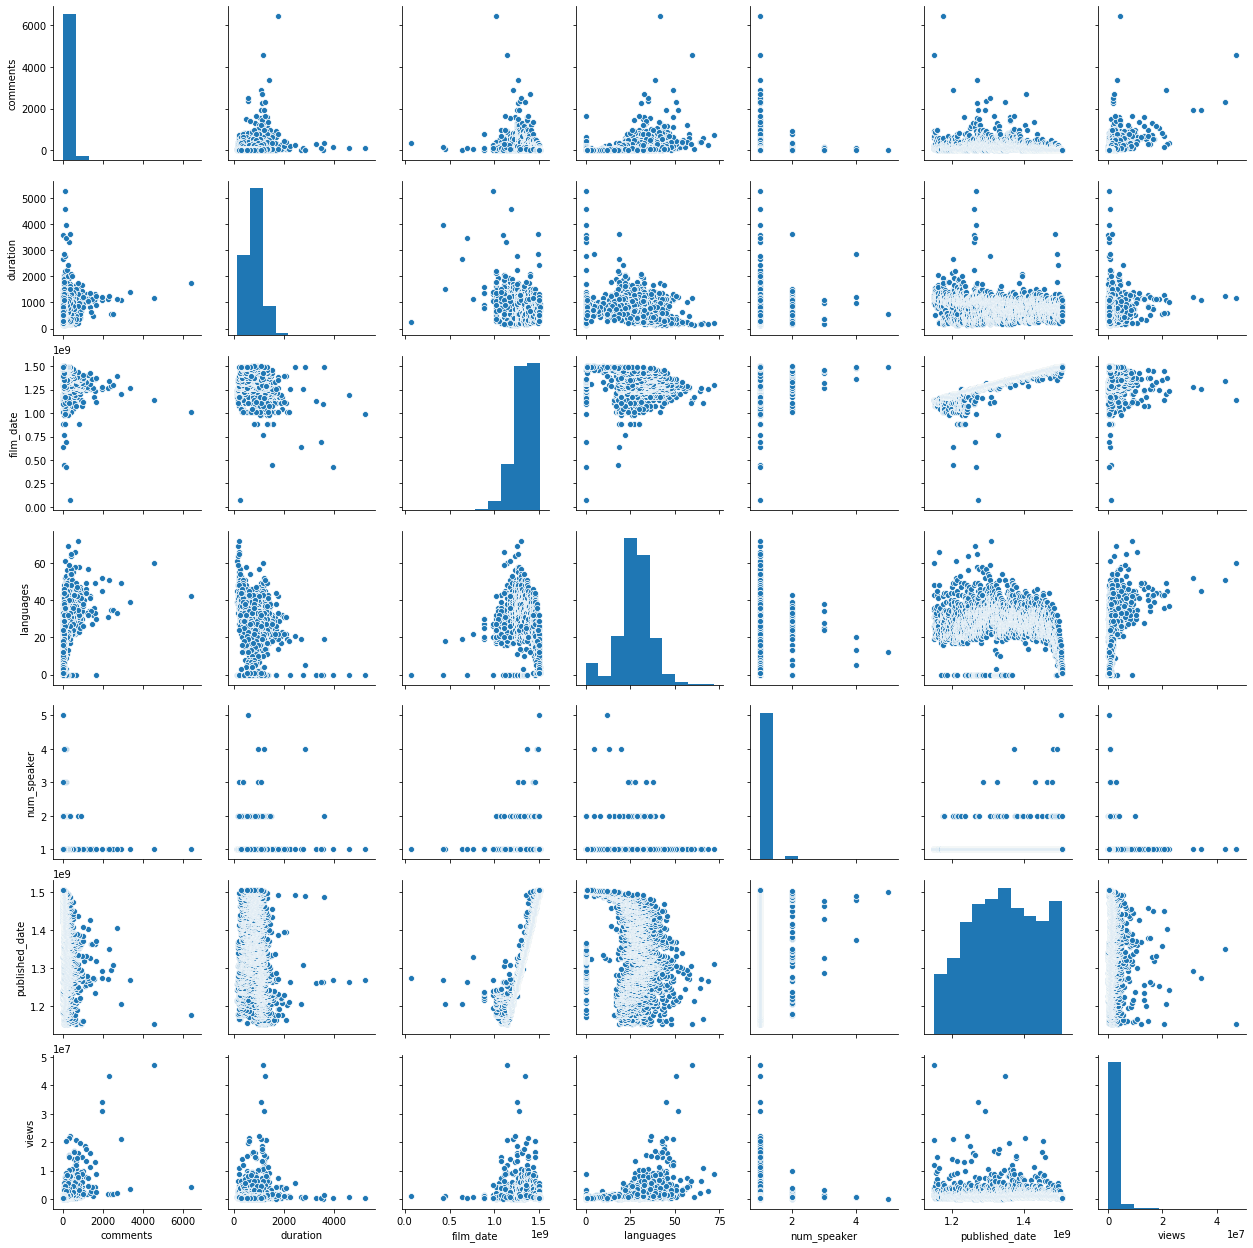

In [7]:
sns.pairplot(ted_description)

In [8]:
gmt = pd.Series()
ted_description.insert(5, 'gmt_film_date',gmt)
ted_description.gmt_film_date = pd.to_datetime(ted_description.film_date, unit = 's')

In [9]:
gmt = pd.Series()
ted_description.insert(11, 'gmt_published_date',gmt)
ted_description.gmt_published_date = pd.to_datetime(ted_description.published_date, unit = 's')

In [10]:
ted_description

comments  \
0         4553   
1          265   
2          124   
3          200   
4          593   
...        ...   
2545        17   
2546         6   
2547        10   
2548        32   
2549         8   

                                                                                                                                                description  \
0     Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.   
1     With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change imme...   
2     New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products tha...   
3     In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and sho...   
4     You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-...   
...                                                                                                                                                     ...   
2545  Between 2008 and 2016, the United States deported more than three million people. What happens to those left behind? Journalist Duarte Geraldino p...   
2546  How can you study Mars without a spaceship? Head to the most Martian place on Earth -- the Atacama Desert in Chile. Astrobiologist Armando Azua-Bu...   
2547  Science fiction visions of the future show us AI built to replicate our way of thinking -- but what if we modeled it instead on the other kinds of...   
2548  In an unmissable talk about race and politics in America, Theo E.J. Wilson tells the story of becoming Lucius25, white supremacist lurker, and the...   
2549  With more than half of the world population living in cities, one thing is undeniable: we are an urban species. Part game, part urban planning ske...   

      duration         event   film_date gmt_film_date  languages  \
0         1164       TED2006  1140825600    2006-02-25         60   
1          977       TED2006  1140825600    2006-02-25         43   
2         1286       TED2006  1140739200    2006-02-24         26   
3         1116       TED2006  1140912000    2006-02-26         35   
4         1190       TED2006  1140566400    2006-02-22         48   
...        ...           ...         ...           ...        ...   
2545       476       TED2017  1496707200    2017-06-06          4   
2546       290       TED2017  1492992000    2017-04-24          3   
2547       651       TED2017  1492992000    2017-04-24          1   
2548      1100  TEDxMileHigh  1499472000    2017-07-08          1   
2549       519       TED2017  1492992000    2017-04-24          1   

             main_speaker  \
0            Ken Robinson   
1                 Al Gore   
2             David Pogue   
3           Majora Carter   
4            Hans Rosling   
...                   ...   
2545     Duarte Geraldino   
2546  Armando Azua-Bustos   
2547       Radhika Nagpal   
2548     Theo E.J. Wilson   
2549    Karoliina Korppoo   

                                                                           name  \
0                                     Ken Robinson: Do schools kill creativity?   
1                                          Al Gore: Averting the climate crisis   
2                                                 David Pogue: Simplicity sells   
3                                            Majora Carter: Greening the ghetto   
4                                 Hans Rosling: The best stats you've ever seen   
...                                                                         ...   
2545       Duarte Geraldino: What we're missing in the debate about immigration   
2546                       Armando Azu

In [11]:
ted_description['description'].apply(text_processing)

0                  [Sir, Ken, Robinson, makes, entertaining, profoundly, moving, case, creating, education, system, nurtures, rather, undermines, creativity]
1       [humor, humanity, exuded, Inconvenient, Truth, Al, Gore, spells, 15, ways, individuals, address, climate, change, immediately, buying, hybrid, inv...
2       [New, York, Times, columnist, David, Pogue, takes, aim, technology’s, worst, interfacedesign, offenders, provides, encouraging, examples, products...
3       [emotionally, charged, talk, MacArthurwinning, activist, Majora, Carter, details, fight, environmental, justice, South, Bronx, shows, minority, ne...
4       [Youve, never, seen, data, presented, like, drama, urgency, sportscaster, statistics, guru, Hans, Rosling, debunks, myths, socalled, developing, w...
                                                                                ...                                                                          
2545    [2008, 2016, United, States, deported, three

In [12]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(ted_description['description'])
print(len(bow_transformer.vocabulary_))

17910


In [13]:
ted_description_bow = bow_transformer.transform(ted_description['description'])

print('Ksztalt Macierzy Rzadkiej: ', ted_description_bow.shape)
print('Liczba Wystąpień Niezerowych: ', ted_description_bow.nnz)

sparsity = (100.0 * ted_description_bow.nnz / (ted_description_bow.shape[0] * ted_description_bow.shape[1]))
print('Rzadkosc: {}'.format(round(sparsity)))

Ksztalt Macierzy Rzadkiej:  (2550, 17910)
Liczba Wystąpień Niezerowych:  74229
Rzadkosc: 0


In [14]:
tfidf_transformer = TfidfTransformer().fit(ted_description_bow)

ted_description_tfidf = tfidf_transformer.transform(ted_description_bow)
print(ted_description_tfidf.shape)

(2550, 17910)


## Przygotowalismy nasze dane 
## Teraz zajmiemy sie dodaniem danych wejsciowych

In [15]:
r = sr.Recognizer()

In [16]:
with sr.Microphone() as source:
    print("Co chcialbys obejrzec?")
    audio = r.listen(source, timeout=3)
    
    try: 
        text = r.recognize_google(audio)
        print('{}'.format(text))
    except:
        print("Nie moglem wykryc glosu")

Co chcialbys obejrzec?
I want to watch something about animals dragons Lyles


In [17]:
data =[[text]]
input_data = pd.DataFrame(data, columns = ['transmitted_audio'])
input_data

transmitted_audio
0  I want to watch something about animals dragons Lyles

In [18]:
input_data['transmitted_audio'].apply(text_processing)

0    [want, watch, something, animals, dragons, Lyles]
Name: transmitted_audio, dtype: object

## Dane przygotowane, teraz zajmiemy sie najlepszym dopasowaniem

In [19]:
inputdata1 = input_data['transmitted_audio'][0]

In [20]:
bow1 = bow_transformer.transform([inputdata1])
print(bow1)
print(bow1.shape)

  (0, 6703)	1
  (0, 15768)	1
  (0, 17458)	1
  (0, 17492)	1
(1, 17910)


In [21]:
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 17492)	0.5537722460366045
  (0, 17458)	0.46046290762057573
  (0, 15768)	0.45098759011665984
  (0, 6703)	0.5271815662425493


In [22]:
ted_detect_model = MultinomialNB().fit(ted_description_tfidf, ted_description['description'])

In [23]:
print("Opis najlepiej dopasowanego filmu: ",ted_detect_model.predict(tfidf1)[0])

Opis najlepiej dopasowanego filmu:  Insects and animals have evolved some amazing skills -- but, as Robert Full notes, many animals are actually over-engineered. The trick is to copy only what's necessary. He shows how human engineers can learn from animals' tricks.


In [24]:
found_comp=ted_detect_model.predict(tfidf1)[0]
ted_description.loc[ted_description['description'] ==found_comp]

comments  \
243        83   

                                                                                                                                               description  \
243  Insects and animals have evolved some amazing skills -- but, as Robert Full notes, many animals are actually over-engineered. The trick is to copy...   

     duration    event   film_date gmt_film_date  languages main_speaker  \
243      1222  TED2002  1012608000    2002-02-02         19  Robert Full   

                                                    name  num_speaker  \
243  Robert Full: Robots inspired by cockroach ingenuity            1   

     published_date  gmt_published_date  \
243      1213837500 2008-06-19 01:05:00   

                                                                                                                                                   ratings  \
243  [{'id': 10, 'name': 'Inspiring', 'count': 221}, {'id': 8, 'name': 'Informative', 'count': 255}, {'id': 22, 'name': 'Fascinating', 'count': 495}, {...   

                                                                                                                                             related_talks  \
243  [{'id': 82, 'hero': 'https://pe.tedcdn.com/images/ted/15238_480x360.jpg', 'speaker': 'Dean Kamen', 'title': 'Luke, a new prosthetic arm for soldie...   

    speaker_occupation  \
243          Biologist   

                                                                                        tags  \
243  ['animals', 'design', 'evolution', 'robots', 'science', 'technology', 'transportation']   

                                      title  \
243  Robots inspired by cockroach ingenuity   

                                                                      url  \
243  https://www.ted.com/talks/robert_full_on_engineering_and_evolution\n   

      views  
243  799797

In [25]:
found_title = ted_description['title'].loc[ted_description['description'] ==found_comp]
found_url = ted_description['url'].loc[ted_description['description'] ==found_comp]
print(found_title)
print(found_url)

243    Robots inspired by cockroach ingenuity
Name: title, dtype: object
243    https://www.ted.com/talks/robert_full_on_engineering_and_evolution\n
Name: url, dtype: object


In [26]:
found_url = found_url.to_string()
found_url.find("h")
found_url = found_url[found_url.find("h"):]

In [27]:
webbrowser.open_new(found_url)

True